# Trope Association Study

## Aim:
In this notebook, a graph of tropes will be generated from the pickled dictionary *film_trope_dict*, and be used to suggest commonly associated tropes based on user-submitted trope list. Weighted edges will be calulated between tropes that appeared in the same movie. 

**Note:** this trope dataset is not joined with the omdb dataset for the purpose of producing the graph, in order to fully use all available DBTropes data.

## Steps:
1. Prior to making the graph, plot the frequency histogram of all tropes. Consider cutting its long tail.
2. Make the graph.
3. Recommendation engine.
4. Filtering user input & handling errors. Consider only use tropes with a frequency above a certain threshold.
5. Bonus: Auto-complete available trope names as user is typing (only in web app?).
6. Bonus: Giving feedback on examples of (top250?) movies in which the recommended trope(s) is used together with user tropes.

In [6]:
# Put all imports in this cell

# Basic needs
from __future__ import print_function  # Because some of the code was moved from Python 3 to 2
import pickle
import re
import itertools

# For graphs
import networkx as nx

# PyData stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read pickled python dict
pkl_file = open('film_trope_dict_python2.pkl', 'rb')
film_trope_dict = pickle.load(pkl_file)
pkl_file.close()

In [5]:
film_trope_dict['TheMatrix']

[u'DownTheRabbitHole',
 u'FiveFiveFive',
 u'AGlitchInTheMatrix',
 u'WallSlump',
 u'MultipleGunshotDeath',
 u'GunshipRescue',
 u'TemptingFate',
 u'CatapultNightmare',
 u'ForbiddenZone',
 u'RoofHopping',
 u'ChainedToARailway',
 u'LadyInRed',
 u'TheChooserOfTheOne',
 u'MilitaryMoonshiner',
 u'BaldBlackLeaderGuy',
 u'WireFu',
 u'HesDeadJim',
 u'YouNeverDidThatForMe',
 u'ViewersAreMorons',
 u'JurisdictionFriction',
 u'UnwinnableTrainingSimulation',
 u'RunOrDie',
 u'OohMeAccentsSlipping',
 u'ImAHumanitarian',
 u'DreamWithinADream',
 u'BigDamnHeroes',
 u'OhCrap',
 u'ImperialStormtrooperMarksmanshipAcademy',
 u'EasterEgg',
 u'RooftopConfrontation',
 u'StressVomit',
 u'TakeThat',
 u'PassThePopcorn',
 u'MotivationalLie',
 u'ThatManIsDead',
 u'TakeMyHand',
 u'PrecisionFStrike',
 u'GoshDangItToHeck',
 u'TheCanKickedHim',
 u'CountingBullets',
 u'GravityIsOnlyATheory',
 u'BarrierBustingBlow',
 u'TitleOnlyOpening',
 u'NotInKansasAnymore',
 u'ReverseArmFold',
 u'MexicanStandoff',
 u'GunsAkimbo',
 u'Co

In [16]:
def add_connection(my_graph, node1, node2):
    '''Add a new connection of node1-node2 to my_graph.
       If edge[node1][node2] already exists in my_graph, add 1 weight.
       Otherwise, create edge[node1][node2] and give it a weight of 1.'''
    
    if my_graph.has_edge(node1, node2):
        my_graph[node1][node2]['weight'] += 1
    else:
        my_graph.add_edge(node1, node2, {'weight':1})


def build_graph(my_dict):
    '''Build a undirected, weighted graph from a dictionary. Each value is a list of items. 
    If item A and B appeared in the same value, add an edge between A-B.'''
    
    G = nx.Graph()
    for value in my_dict.values():
        for (item1, item2) in itertools.combinations(value, 2):
            if item1 != item2:
                add_connection(G, item1, item2)
    return G
 
    
def print_graph(my_graph, verbose=False, draw_graph=False):
    '''Print a summary of nodes and edges of my_graph, possibly with a picture presentation.'''
    
    # Nodes
    print('Total Nodes: {}'.format(len(my_graph.nodes())))
    if verbose:
        print(my_graph.nodes())
        
    # Edges    
    print('Total Edges: {}'.format(len(my_graph.edges())))
    if verbose:
        print(my_graph.edges())
        
    # Draw graph
    if draw_graph:
        if len(my_graph.nodes()) > 50:
            print('More than 50 nodes: drawing is not recommended.')
        else:
            nx.draw(my_graph, with_labels=True)
            plt.show()
            
   

Total Nodes: 4
['a', 'c', 'b', 'd']
Total Edges: 3
[('a', 'b'), ('c', 'b'), ('b', 'd')]


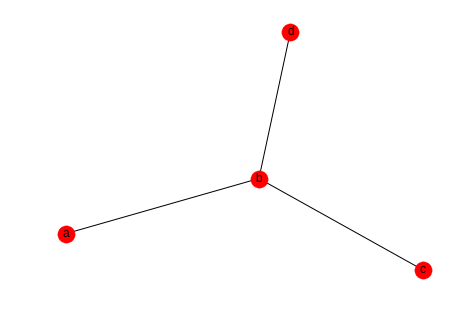

In [21]:
# minimum test example
H = build_graph({1:['a', 'b'], 2:['b', 'c'], 3:['b', 'd']})
print_graph(H, verbose=True, draw_graph=True)

In [22]:
# Build a graph from the film_trope_dict dictionary.
# There is 18270 nodes, 7409784 edges.
trope_graph = build_graph(film_trope_dict)

In [23]:
print_graph(trope_graph)

Total Nodes: 18270
Total Edges: 7409784


In [ ]:
## Pickling / Unpickling the graph 

# Save
output = open('trope_graph.pkl', 'wb')
pickle.dump(trope_graph, output, protocol=2) # default protocol is 3 in Python 3, not supported in Python 2
output.close()

## Load
# pkl_file = open('trope_graph.pkl', 'rb')
# trope_graph = pickle.load(pkl_file)
# pkl_file.close()